# FCI Construction
In order to perform a robust quantile analysis we need some sort of FCI (Financial Conditions Index) for Finland.
In order to perform quantile regression it is suggested to use PCA to find the indicators which explain in the best way variance in the data. 
I am now going to read about Finland's economy in order to come up with a set of financial indicators that I can conduct the analysis on and choose a few indicators to create a partition from.

## Finland's Economy
From IMF report on Finland
The Finnish banking sector is highly interconnected with the wider Nordic/Baltic
region - This brings financial diversification, but also considerable contagion risk. Finnish banks’ net
foreign assets have gradually increased since the GFC and are 26.5 percent of GDP. The largest cross
border exposures are to the Nordics and euro area. The banking sector is also exposed to indirect
linkages from trade, with largest trade exposures to Germany, Sweden, the United States, and the
Russian Federation

| Indicator            | Description                                                             | Where is it taken from | url |
|----------------------|-------------------------------------------------------------------------|------------------------|-----|
| Interest Rate        | Title                                                                   |                        |     |
| House price growth   | Text                                                                    |                        |     |
| Credit to GDP growth | Text                                                                    |                        |     |
| Credit to GDP Gap    | How leveraged the economy is. An indicator of a heating/cooling economy |                        |     |
| House price growth   | Text                                                                    |                        |     |

Another option is to create an FCI (Financial Conditions Index) for finland. There are different methods for doing this but it requires more analysis.


### Data and their source


Long term government bonds yields - https://fred.stlouisfed.org/series/IRLTLT01FIA156N \
Short term bond yields (3 months) - https://fred.stlouisfed.org/series/IR3TIB01FIM156N \
Dollar/Euro Exchange rate - https://fred.stlouisfed.org/series/CCUSMA02FIA618N \
Real Residential Property Prices for Finland - https://fred.stlouisfed.org/series/QFIR628BIS#0 annual data aggregated by average
\
Financial Market: Share Prices for Finland - https://fred.stlouisfed.org/series/SPASTT01FIM661N \ 
Volatility of Stock Price Index for Finland - https://fred.stlouisfed.org/series/DDSM01FIA066NWDB \
 Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for Finland - https://fred.stlouisfed.org/series/FINCPIALLMINMEI#0 \

Total Credit to Households and Non-Profit Institutions Serving Households - https://fred.stlouisfed.org/series/CRDQFIAHUBIS#0

General government EDP deficit and debt, annually by Sector - https://pxdata.stat.fi/PxWeb/pxweb/en/StatFin/StatFin__jali/statfin_jali_pxt_122g.px/table/tableViewLayout1/



FRED data


Stock market - OMX Helsinki 25 index
Interest rate spread - profitability of the banks. the spread between how much banks earn on loans and how much they earn on deposits at the central bank.
Finland changed from Helibbor to Euribor
Interest rates - lending, deposit and combinations of them.
debt - central government debt?
different credit info?


Credit - ???



FCI plan:
First get all quarterly data
create a quarterly fci and an annual fci (by using averages over annual data)
maybe later: use midas probit model on the quarterly fci in order to weight the different fci samples each quarter


In [1]:
#specifying where to fetch the data for different factors for the FCI

data_map = {
    'long_term_rates': {
        'path': 'fci_data/FRED/fred_long_term_gvmt_bonds_10_years.csv',
        'date_column_name': 'DATE',
        'price_column_name': 'IRLTLT01FIM156N',
        'rename_map': {
            'price': 'long_term_yield',
            'growth': 'long_term_yield_growth'
        }
    },
    'short_term_rates': {
        'path': 'fci_data/FRED/fred_short_term_gvmt_bonds_3_months.csv',
        'date_column_name': 'DATE',
        'price_column_name': 'IR3TIB01FIM156N',
        'rename_map': {
            'price': 'short_term_yield',
            'growth': 'short_term_yield_growth'
        }
    },
    'dollar_to_euro_exchange': {
        'path': 'fci_data/FRED/fred_dollar_to_euro_exchange_rate.csv',
        'date_column_name': 'DATE',
        'price_column_name': 'CCUSMA02FIA618N',
        'rename_map': {
            'price': 'dollar_to_euro_exchange',
            'growth': 'dollar_to_euro_exchange_growth'
        }
    },
    'real_prop_price': {
        'path': 'fci_data/FRED/fred_real_resedential_property_prices_quarterly.csv',
        'date_column_name': 'DATE',
        'price_column_name': 'QFIR628BIS',
        'rename_map': {
            'price': 'real_prop_price',
            'growth': 'real_prop_price_growth'
        }
    },
    'omx_helsinki_25': {
        'path': 'fci_data/OMX Helsinki 25 Historical Price Data.csv',
        'date_column_name': 'Date',
        'price_column_name': 'Price',
        'rename_map': {
            'price': 'omx25_price',
            'growth': 'omx25_price_growth'
        },
        'timestamp_format': "%d/%m/%y"
    },
    'equity_price': {
        'path': 'fci_data/FRED/fred_share_price_for_finland.csv',
        'date_column_name': 'DATE',
        'price_column_name': 'SPASTT01FIM661N',
        'rename_map': {
            'price': 'equity_price',
            'growth': 'equity_price_growth'
        }
    },
    'equity_volatility': {
        'path': 'fci_data/FRED/fred_volatility_stock_price_index.csv',
        'date_column_name': 'DATE',
        'price_column_name': 'DDSM01FIA066NWDB',
        'rename_map': {
            'price': 'equity_volatility',
            'growth': 'equity_volatility_growth'
        }
    },
    'credit': {
        'path': 'fci_data/FRED/fred_credit_hh_np_quarterly.csv',
        'date_column_name': 'DATE',
        'price_column_name': 'CRDQFIAHUBIS',
        'rename_map': {
            'price': 'credit_value',
            'growth': 'credit_growth'
        }
    },
    'gov_debt_to_gdp': {
        'path': 'fci_data/statistics_finland/fin_stats_general_gov_debt_to_gdp_ratio.csv',
        'date_column_name': 'Year',
        'price_column_name': 'EDP debt, ratio to GDP, %',
        'rename_map': {
            'price': 'leverage',
            'growth': 'leverage_growth'
        },
        'timestamp_format': "%Y"
    },
    'consumer_price': {
        'path': 'fci_data/FRED/fred_consumer_price_index_monthly.csv',
        'date_column_name': 'DATE',
        'price_column_name': 'FINCPIALLMINMEI',
        'rename_map': {
            'price': 'quarterly_consumer_price',
            'growth': 'quarterly_inflation'
        }
    },
    'vix': {
        'path': 'fci_data/FRED/vix_quarterly_agg.csv',
        'date_column_name': 'DATE',
        'price_column_name': 'VIXCLS',
        'rename_map': {
            'price': 'vix',
            'growth': 'vix_growth'
        }
    }
}

C:\Users\yarde\PycharmProjects\ggdp_research\fci_functions.py:112: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vol_list = [returns_var[0]]
C:\Users\yarde\PycharmProjects\ggdp_research\fci_functions.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr_vol = (1 - gamma) * returns_var[i - 1] + gamma * vol_list[-1]


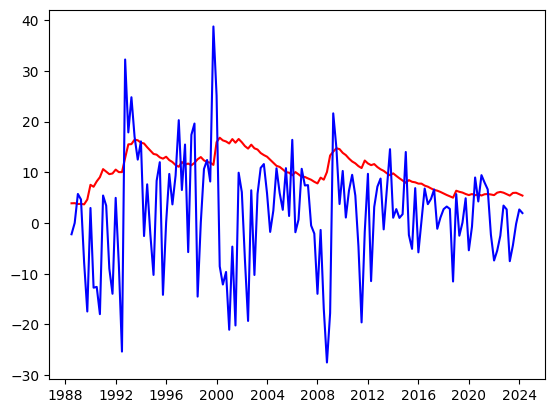

In [7]:
import pandas as pd
from fci_functions import read_and_process_data, process_data_for_fci, calculate_ewma_volatility
import matplotlib.pyplot as plt

#Loading data according to the map
long_term_rates = read_and_process_data(**data_map['long_term_rates'])
long_term_rates_quart = read_and_process_data(**data_map['long_term_rates'], freq='quarter')

short_term_rates = read_and_process_data(**data_map['short_term_rates'])
short_term_rates_quart = read_and_process_data(**data_map['short_term_rates'], freq='quarter')

dollar_to_euro_exchange_rate = read_and_process_data(**data_map['dollar_to_euro_exchange'])

real_res_prop_price_year = read_and_process_data(**data_map['real_prop_price'])
real_res_prop_price_quarter = read_and_process_data(**data_map['real_prop_price'], freq='quarter')

# omx_helsinki_25 = pd.read_csv('fci_data/OMX Helsinki 25 Historical Price Data.csv')
# omx_helsinki_25['Price'] = omx_helsinki_25['Price'].apply(lambda x: x.replace(',', ''))

omx_helsinki_25_year = read_and_process_data(**data_map['omx_helsinki_25'])
omx_helsinki_25_quart = read_and_process_data(**data_map['omx_helsinki_25'], freq='quarter')
omx_quart_growth = omx_helsinki_25_quart['omx25_price_growth'].dropna()
omx_ewma_vol = calculate_ewma_volatility(omx_helsinki_25_quart['omx25_price_growth'].dropna(), gamma=0.9)

t = omx_ewma_vol.index.to_list()
plt.plot(t, omx_ewma_vol * 100, 'r')
plt.plot(t, omx_helsinki_25_quart['omx25_price_growth'].dropna() * 100, 'b')
plt.show()


equity_price = read_and_process_data(**data_map['equity_price'])
equity_price_quart = read_and_process_data(**data_map['equity_price'], freq='quarter')

equity_volatility = read_and_process_data(**data_map['equity_volatility'])

vix_quart = read_and_process_data(**data_map['vix'], freq='quarter')

credit_data = read_and_process_data(**data_map['credit'])
credit_quart = read_and_process_data(**data_map['credit'], freq='quarter')

gov_leverage = read_and_process_data(**data_map['gov_debt_to_gdp'])

wdi_data = pd.read_pickle('ggdp_processed_data/wdi_data_processed.pkl')
carbon_emissions = wdi_data['finland_co2_kt'].to_frame()
carbon_emissions['year'] = carbon_emissions.index.values
carbon_emissions = process_data_for_fci(carbon_emissions, 'year', 'finland_co2_kt', freq='year')
carbon_emissions = carbon_emissions.rename(columns={'price': 'carbon_emissions', 'growth': 'carbon_emissions_growth'})

consumer_price_quarterly = read_and_process_data(**data_map['consumer_price'], freq='quarter')
inflation_quarterly = consumer_price_quarterly['quarterly_inflation']




## Weighted Average FSI - financial stress indicator
According to a study by the ECB: https://www.ecb.europa.eu/pub/pdf/scpwps/ecb.wp2451~cbf3f02232.en.pdf
a simple weighted avergage with weights according to what we know can prove to be better than some very complicated methods for deriving FCIs.
I might want to use partitions and partition the data into 3 different categories according to the IMF's GaR guide.
At the moment I'm just trying to build a simple pipeline to see that I know how to do all the steps.

In [14]:
from fci_functions import serial_join, create_wa_fci_from_data

wa_fsi_weights = {'credit_growth': 10,
                  'long_term_yield': 15,
                  'short_term_yield': 15,
                  'equity_price_growth': -15,
                  'equity_volatility': 25,
                  'real_prop_price_growth': -15,
                  'dollar_to_euro_exchange': 5}

factors_joint_df = serial_join(
    [credit_data, long_term_rates, short_term_rates, equity_price, equity_volatility, real_res_prop_price_year,
     dollar_to_euro_exchange_rate])
wa_fsi = create_wa_fci_from_data(factors_joint_df, wa_fsi_weights)

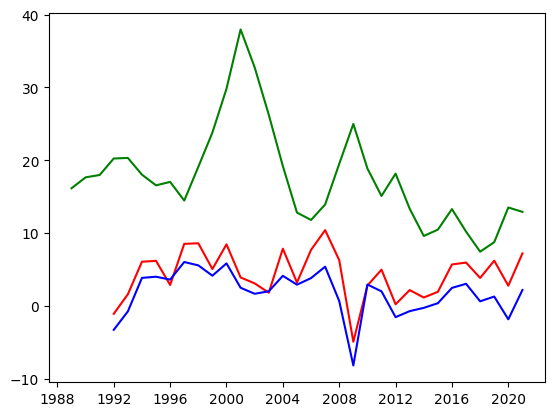

In [15]:
import numpy as np
import statsmodels.formula.api as smf

#bind data together
#load ggdp data

ggdp_data = pd.read_pickle('ggdp_processed_data/finland_ggdp_imputed.pkl')
ggdp_data = ggdp_data[['ggdp_ppp_growth', 'ggdp_real_growth']]
ggdp_data.index = pd.to_datetime(ggdp_data.index, format='%Y')

ggdp_sim_data = pd.read_pickle('ggdp_processed_data/ggdp_ppp_simulated_data.pkl')
ggdp_sim_data.index = pd.to_datetime(ggdp_sim_data.index, format="%Y")

quantile_reg_data = ggdp_data.join(wa_fsi)

# plt.plot(ggdp_data)

t = quantile_reg_data.index.to_list()
plt.plot(t, quantile_reg_data['ggdp_ppp_growth'] * 100, 'r')
plt.plot(t, quantile_reg_data['ggdp_real_growth'] * 100, 'b')
plt.plot(t, quantile_reg_data['fci'], 'g')
plt.show()


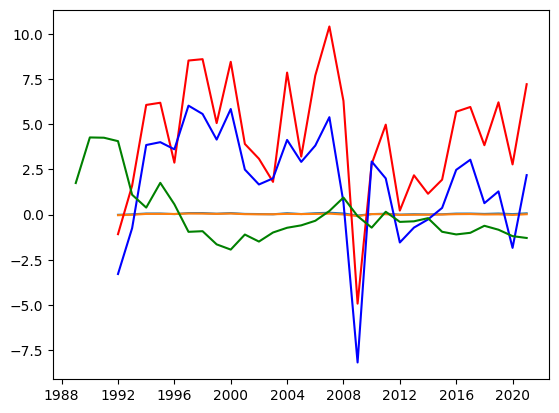

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

#using PCA to create an index
fci_clean = factors_joint_df.dropna(axis=0, how='any')
fci_filtered = fci_clean[
    ['credit_growth', 'long_term_yield', 'short_term_yield', 'equity_price_growth', 'equity_volatility',
     'real_prop_price_growth', 'dollar_to_euro_exchange']]
fci_norm = (fci_filtered - fci_filtered.mean()) / fci_filtered.std()

#calculating the fci using all the data
fci_data = fci_norm @ pca.fit(fci_norm).components_.transpose()
fci_data.columns = ['fci']
#fci_data = pca.fit_transform(fci_norm)

quantile_reg_data = ggdp_data.join(fci_data)

plt.plot(ggdp_data)

t = quantile_reg_data.index.to_list()
plt.plot(t, quantile_reg_data['ggdp_ppp_growth'] * 100, 'r')
plt.plot(t, quantile_reg_data['ggdp_real_growth'] * 100, 'b')
plt.plot(t, quantile_reg_data['fci'], 'g')
plt.show()



## 3 Partitions

The idea according to the IMF guide is to group them into partitions with economic similarity

1) Domestic Price of Risk - risk spreads, asset returns, price volatility



2) Credit Aggregates - leverage and credit growth


3) External Conditions - global risk sentiment, commodity prices, exchange rate
- cost of dollar
- equity volatility

3) Environmental factors
- carbon emissions
- 
4) Other factors


----
domestic price of risk
credit aggregates external conditions

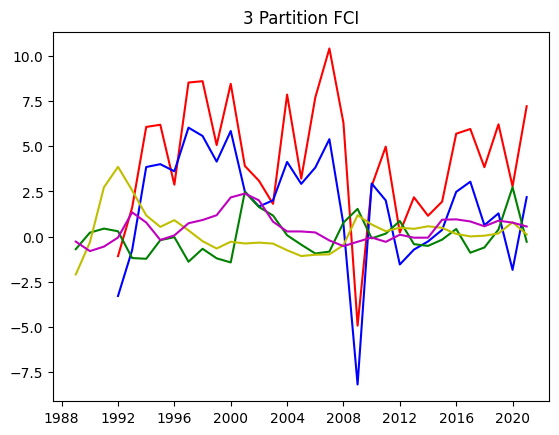

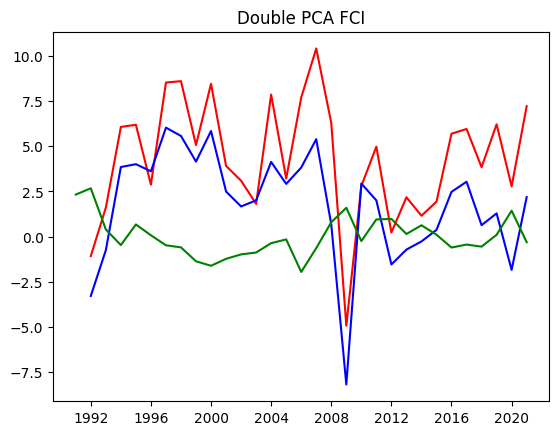

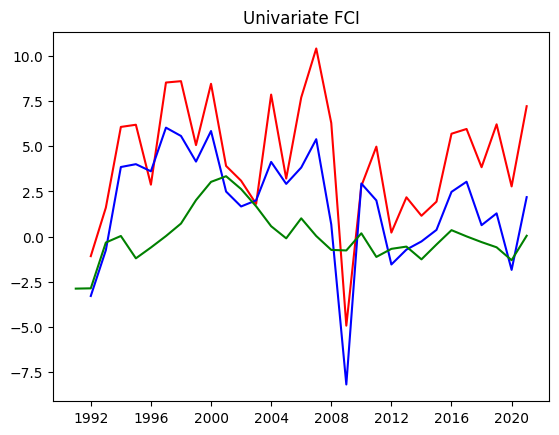

In [17]:
from fci_functions import transform_to_fci

#creating 3 partitions with PCA for each partition

dom_price_of_risk = serial_join([equity_price['equity_price_growth'], equity_volatility['equity_volatility'],
                                 long_term_rates['long_term_yield_growth']])
price_risk_fci = transform_to_fci(dom_price_of_risk.dropna(axis=0, how='any'), fci_name='price_risk_fci')

credit_aggregates = serial_join([credit_data['credit_growth'], gov_leverage['leverage_growth']])
credit_fci = transform_to_fci(credit_aggregates.dropna(axis=0, how='any'), fci_name='credit_fci')

external_conditions = serial_join(
    [dollar_to_euro_exchange_rate['dollar_to_euro_exchange'], carbon_emissions['carbon_emissions_growth']])
external_fci = transform_to_fci(external_conditions.dropna(axis=0, how='any'), fci_name='external_fci')

#partition_fci_data = serial_join([price_risk_fci, credit_fci, external_fci])
external_fci_test = dollar_to_euro_exchange_rate['dollar_to_euro_exchange']
external_fci_test = (external_fci_test - external_fci_test.mean()) / external_fci_test.std()
external_fci_test = external_fci_test.rename('external_fci')

# partition_fci_data = serial_join([price_risk_fci, credit_fci, external_fci])
partition_fci_data = serial_join([price_risk_fci, credit_fci, external_fci_test])
partition_fci_data = ggdp_data.join(partition_fci_data)
t = partition_fci_data.index.to_list()

#3 partitions
plt.plot(t, partition_fci_data['ggdp_ppp_growth'] * 100, 'r')
plt.plot(t, partition_fci_data['ggdp_real_growth'] * 100, 'b')
plt.plot(t, partition_fci_data['price_risk_fci'], 'g')
plt.plot(t, partition_fci_data['credit_fci'], 'y')
plt.plot(t, partition_fci_data['external_fci'], 'm')
plt.title("3 Partition FCI")
plt.show()

#### double pca

double_pca_fci_data = serial_join([price_risk_fci, credit_fci, external_fci])
#double_pca_fci_data = serial_join([credit_fci, external_fci])
double_pca_fci = transform_to_fci(double_pca_fci_data.dropna(axis=0, how='any'), fci_name='double_pca_fci')
double_pca_fci = ggdp_data.join(double_pca_fci)
t = double_pca_fci.index.to_list()

#3 partitions
plt.plot(t, double_pca_fci['ggdp_ppp_growth'] * 100, 'r')
plt.plot(t, double_pca_fci['ggdp_real_growth'] * 100, 'b')
plt.plot(t, double_pca_fci['double_pca_fci'], 'g')
plt.title("Double PCA FCI")
plt.show()

#checking these against a univariate FCI with PCA as well
univariate_fci_data = serial_join([equity_price['equity_price_growth'], equity_volatility['equity_volatility'],
                                   long_term_rates['long_term_yield_growth'], credit_data['credit_growth'],
                                   gov_leverage['leverage_growth'],
                                   dollar_to_euro_exchange_rate['dollar_to_euro_exchange'],
                                   carbon_emissions['carbon_emissions_growth']])

univariate_fci = transform_to_fci(univariate_fci_data.dropna(axis=0, how='any'), fci_name='univariate_fci')
univariate_fci = ggdp_data.join(univariate_fci)
t = univariate_fci.index.to_list()
#univariate

plt.plot(t, univariate_fci['ggdp_ppp_growth'] * 100, 'r')
plt.plot(t, univariate_fci['ggdp_real_growth'] * 100, 'b')
plt.plot(t, univariate_fci['univariate_fci'], 'g')
plt.title("Univariate FCI")
plt.show()


In [18]:
## TODO: when we look at the PCA it seems like we could maybe lag the double PCA by 1-2 lags or come up with a lagged model, becasue we can see that although there's a spike in the GGDP when there's a dip in FCI but it doesn't happen exactly at the same time

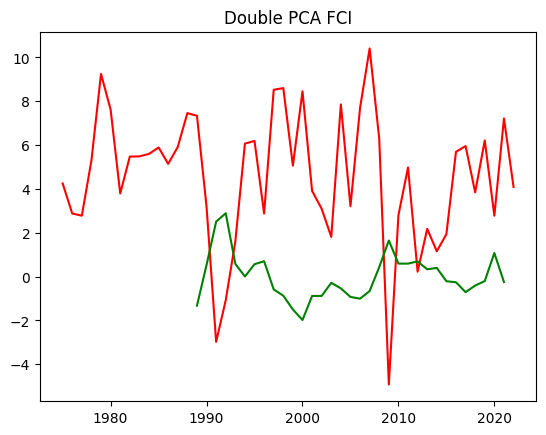

In [19]:
#Let's have a look at double PCA FCI with simulated data

double_pca_fci_data = serial_join([price_risk_fci, credit_fci, external_fci_test])
#double_pca_fci_data = serial_join([credit_fci, external_fci_test])
double_pca_fci = transform_to_fci(double_pca_fci_data.dropna(axis=0, how='any'), fci_name='double_pca_fci')
double_pca_fci_sim = ggdp_sim_data.join(double_pca_fci)
t = double_pca_fci_sim.index.to_list()

#3 partitions
plt.plot(t, double_pca_fci_sim['ggdp_ppp_growth_simulated'] * 100, 'r')
plt.plot(t, double_pca_fci_sim['double_pca_fci'], 'g')
plt.title("Double PCA FCI")
plt.show()

In [20]:

# 3 partition

# plt.plot(t, partition_fci_data['price_risk_fci'], 'g')
# plt.plot(t, partition_fci_data['credit_fci'], 'y')
# plt.plot(t, partition_fci_data['external_fci'], 'm')

q = 0.8

mod = smf.quantreg("ggdp_ppp_growth ~ price_risk_fci + credit_fci + external_fci ", partition_fci_data)
res = mod.fit(q=q)
print(res.summary())

mod = smf.quantreg("ggdp_ppp_growth ~ univariate_fci ", univariate_fci)
res = mod.fit(q=q)
print(res.summary())

mod = smf.quantreg("ggdp_ppp_growth ~ double_pca_fci ", double_pca_fci_sim)
res = mod.fit(q=q)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:        ggdp_ppp_growth   Pseudo R-squared:               0.4257
Model:                       QuantReg   Bandwidth:                     0.05668
Method:                 Least Squares   Sparsity:                       0.1038
Date:                Sun, 30 Jun 2024   No. Observations:                   30
Time:                        16:30:24   Df Residuals:                       26
                                        Df Model:                            3
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0729      0.009      7.727      0.000       0.054       0.092
price_risk_fci    -0.0119      0.008     -1.404      0.172      -0.029       0.006
credit_fci        -0.0208      0.011     -1.909      0.067      -0.043       0.002
external_fci      -0.0029      0

In [21]:
#I saw that when having a look at the 3 FCIs before combining into 1, the Credit FCI and External were most prominant

## Moving to quarterly data
Since annual data is very sparse as it is, we should try to take advantage of the fact that there is quarterly data available. The problem is that I was only able to calculate annual GGDP. Interestingly enough, GGDP in PPP and Real GDP are cointegrated (very significantly). So assuming the same dynamics for quarterly change in GDP, I was able to retrieve quarterly GGDP change. The difference is that carbon emission data is not available each quarter. But the fact that I am able to move to using quarterly data is very helpful because this means I have 4 times the amount of data, better estimations. 

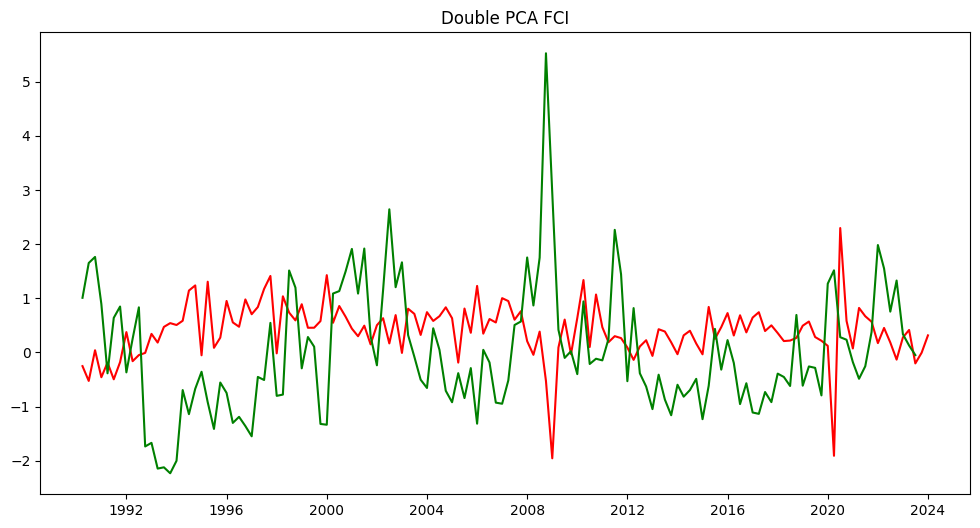

In [24]:
ggdp_quart = pd.read_pickle('ggdp_processed_data/ggdp_ppp_quarterly_simulated_data.pkl')
#creating double pca for quarterly data

# options that we have: inflation_quarterly, real_res_prop_price_quarter['real_prop_price_growth'], credit_quart['credit_growth']
# short_term_rates_quart['short_term_yield_growth'], equity_price_quart

price_of_risk_quart_data = serial_join([short_term_rates_quart['short_term_yield_growth'], inflation_quarterly,
                                        real_res_prop_price_quarter['real_prop_price_growth'],
                                        long_term_rates_quart['long_term_yield_growth'],
                                        equity_price_quart['equity_price_growth'],
                                        omx_helsinki_25_quart['omx25_price_growth']])

price_risk_quart_fci = transform_to_fci(price_of_risk_quart_data.dropna(axis=0, how='any'), fci_name='price_risk_fci')

credit_quart_data = serial_join([credit_quart['credit_growth']])
credit_quart_fci = transform_to_fci(credit_quart_data.dropna(axis=0, how='any'), fci_name='credit_fci')

external_shocks_quart_data = serial_join([vix_quart['vix']])
external_shocks_fci = transform_to_fci(external_shocks_quart_data.dropna(axis=0, how='any'), fci_name='foreign_fci')

double_pca_fci_quarterly_data = serial_join([price_risk_quart_fci, credit_quart_fci, external_shocks_fci])
double_pca_quart_fci = transform_to_fci(double_pca_fci_quarterly_data.dropna(axis=0, how='any'),
                                        fci_name='double_pca_fci')

double_pca_quart_fci = ggdp_quart.join(serial_join([double_pca_quart_fci, double_pca_fci_quarterly_data]))
#double_pca_fci['date'] = pd.to_datetime(double_pca_quart_fci.index)
t = double_pca_quart_fci.index

plt.figure(figsize=(12, 6))
plt.plot(t, double_pca_quart_fci['quarterly_ggdp_ppp_growth_annualized'] * 10, 'r')
# plt.plot(t, double_pca_quart_fci['quarterly_gdp_real_growth']*10,'b')
plt.plot(t, double_pca_quart_fci['double_pca_fci'], 'g')
plt.title("Double PCA FCI")
plt.show()

## Quantile regression for quarterly data

In [25]:
from fci_functions import Lag

#setting the look ahead for quantile regression

#setting the look ahead period
lag_number = 4
double_pca_quart_fci['lagged_fci'] = double_pca_quart_fci['double_pca_fci'].shift(lag_number)

q = 0.05

#Partitions
mod = smf.quantreg(
    "quarterly_ggdp_ppp_growth_annualized ~ Lag(price_risk_fci,4) +  Lag(credit_fci,4) + Lag(foreign_fci,4)",
    data=double_pca_quart_fci, missing='drop')
res = mod.fit(q=q)
print(res.summary())

#Double PCA
mod = smf.quantreg("quarterly_ggdp_ppp_growth_annualized ~ Lag(double_pca_fci,4) ", data=double_pca_quart_fci,
                   missing='drop')
res = mod.fit(q=q)
print(res.summary())

                                  QuantReg Regression Results                                   
Dep. Variable:     quarterly_ggdp_ppp_growth_annualized   Pseudo R-squared:              0.04313
Model:                                         QuantReg   Bandwidth:                     0.04423
Method:                                   Least Squares   Sparsity:                       0.3131
Date:                                  Sun, 30 Jun 2024   No. Observations:                  132
Time:                                          16:31:02   Df Residuals:                      128
                                                          Df Model:                            3
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.0215      0.007     -3.029      0.003      -0.036      -0.007
Lag(price_risk_fci, 4)     0.0061      0.006    

## Quantile regression with the different FCIs

## Bootstrapping QR
 I am using MBB (Moving Blocks Bootstrapping) to bootstrap QR. according to this paper: https://www.sciencedirect.com/science/article/abs/pii/S0304407697000584

In [12]:
from bootstrap_functions import MovingBlockBootstrap

data_sample_for_bootstrapping = double_pca_fci[['ggdp_ppp_growth', 'double_pca_fci']]
data_sample_for_bootstrapping = data_sample_for_bootstrapping.dropna(axis=0, how='any')

ggdp_ppp_growth_sample = data_sample_for_bootstrapping['ggdp_ppp_growth'].to_numpy()
double_pca_fci_sample = data_sample_for_bootstrapping['double_pca_fci'].to_numpy()


def multiple_quantiles_regression(data, formula: str, quantiles: list) -> pd.DataFrame:
    quantiles_res = {}
    for curr_q in quantiles:
        quantile_regression_model = smf.quantreg(formula=formula, data=data)
        quantiles_res[curr_q] = (quantile_regression_model.fit(q=curr_q))
    return quantiles_res


quantiles = np.arange(0.05, 0.96, 0.1)

mbb = MovingBlockBootstrap(block_size=5)
bootstrap_res = mbb.bootstrap(sample_data=data_sample_for_bootstrapping, reps=200,
                              statistic_func=multiple_quantiles_regression, formula="ggdp_ppp_growth ~ double_pca_fci",
                              quantiles=quantiles)

print("1234")

#now I want to calculate my statistic over the bootstrapped samples

KeyError: "['ggdp_ppp_growth'] not in index"

In [17]:


quantiles = np.linspace(0.05, 0.95, 10)

mod = smf.quantreg("ggdp_ppp_growth ~ fci ", bs_df)
res = mod.fit(q=0.05)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:        ggdp_ppp_growth   Pseudo R-squared:               0.3824
Model:                       QuantReg   Bandwidth:                     0.02232
Method:                 Least Squares   Sparsity:                       0.2296
Date:                Thu, 06 Jun 2024   No. Observations:                  290
Time:                        17:46:32   Df Residuals:                      288
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0085      0.004     -2.149      0.033      -0.016      -0.001
fci           -0.0273      0.006     -4.555      0.000      -0.039      -0.016


In [22]:
n_samples = 10
X = np.arange(n_samples)

# Instantiate the bootstrap object
n_bootstraps = 200
block_length = 3
rng = 42
mbb = MovingBlockBootstrap(n_bootstraps=n_bootstraps, rng=rng, block_length=block_length)

# Generate bootstrapped samples
return_indices = False
bootstrapped_samples = mbb.bootstrap(
    X, return_indices=return_indices)

# Collect bootstrap samples
X_bootstrapped = []
for data in bootstrapped_samples:
    X_bootstrapped.append(data)

X_bootstrapped = np.array(X_bootstrapped)
print('1234')

[0 1 2 3 4 5 6 7 8 9]


KeyboardInterrupt: 

In [7]:
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# # Standardize the data
# scaler = StandardScaler()
# standardized_data = scaler.fit_transform(data)
# 
# # Apply PCA
# pca = PCA()
# pca.fit(standardized_data)
# 
# # First principal component
# fci = pca.transform(standardized_data)[:, 0]
# 
# # Add FCI to the dataframe
# data['FCI'] = fci
# 
# import ace_tools as tools; tools.display_dataframe_to_user(name="FCI Data", dataframe=data)
# 
# # Display the first few rows of the FCI
# data.head()

In [ ]:
#MIDAS PROBIT

import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm

# Example data
quarterly_data = pd.read_csv("quarterly_data.csv")  # Load your quarterly data
annual_data = pd.read_csv("annual_data.csv")  # Load your annual outcome data


# Define your weighting function (beta)
def beta_weights(K, theta1, theta2):
    weights = [((k / (K + 1)) ** (theta1 - 1) * (1 - (k / (K + 1))) ** (theta2 - 1)) for k in range(1, K + 1)]
    return weights / np.sum(weights)


# Apply weights to quarterly predictors
def aggregate_predictors(quarterly_data, K, theta1, theta2):
    weights = beta_weights(K, theta1, theta2)
    aggregated = np.dot(quarterly_data[-K:], weights)
    return aggregated


# Fit the MIDAS-Probit model
def fit_midas_probit(quarterly_data, annual_data, K, theta1, theta2):
    aggregated_predictors = np.array(
        [aggregate_predictors(quarterly_data[i:i + K], K, theta1, theta2) for i in range(len(annual_data))])
    model = sm.Probit(annual_data, sm.add_constant(aggregated_predictors))
    result = model.fit()
    return result


# Example usage
K = 4 * 5  # 5 years of quarterly data
theta1, theta2 = 2, 2
result = fit_midas_probit(quarterly_data, annual_data, K, theta1, theta2)

# Forecasting
new_quarterly_data = pd.read_csv("new_quarterly_data.csv")  # New quarterly data for forecasting
aggregated_predictors_new = aggregate_predictors(new_quarterly_data, K, theta1, theta2)
forecast_probability = norm.cdf(result.params[0] + result.params[1] * aggregated_predictors_new)
print(f"Forecasted Probability: {forecast_probability}")


